# 1 Développement d'un perceptron


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from random import randint, choice
from pylab import *

### 1.1 Mise en place d'un perceptron simple

In [ ]:
# la variable w contient les poids synaptiques du neurone (vecteur à 3 lignes, la première ligne correspond à au seuil)
# la variable x contient 
def perceptron_simple(x, w, active):
    x0 = np.concatenate(([1], x)) # x0 = 1
    v = np.sum(np.multiply(x0, w))

    if active == 0:
        return np.sign(v)
    elif active == 1:
        return np.tanh(v)   

In [ ]:
# UTILS

# Affichage des entrées sous forme de graphique
def getClass(p):
  if p >= 0:
    return 'g'
  else:
    return 'r'

# Affichage des entrées sous forme de graphique avec plusieurs classes
def getClass(p, classes = [-1, 0, 1, 2, 3 ]):
  if p == classes[0]:
    return 'g'
  elif p == classes[1]:
    return 'b'
  elif p == classes[2]:
    return 'r'
  elif p == classes[3]:
    return 'y'
  elif p == classes[4]:
    return 'c'

def initGrid(xmin, xmax, ymin, ymax):
  x = np.linspace(xmin,xmax,50)
  plt.xlim(xmin,xmax)
  plt.ylim(ymin,ymax)
  plt.grid()

def putPoints(X, YD, classes = [-1, 0, 1, 2, 3 ]):
  for p in range(len(YD)):
    plt.plot(X[p][0], X[p][1], getClass(YD[p], classes) + 'o')

def putLine(xmin, xmax, w):
  x = np.linspace(xmin,xmax,50)
  y = (w[0] + x*w[1]) / (-w[2])
  plt.plot(x, y)

def putMultipleLines(xmin, xmax, multi_w):
  x = np.linspace(xmin,xmax,50)
  for i in range(len(multi_w)):
    y = (multi_w[i][0] + x*multi_w[i][1]) / (-multi_w[i][2])
    plt.plot(x, y)

def showGrid(title = ''):
  plt.title(title)
  plt.show()  


# afficher la droite séparatrice associée aux poids du neurone
def droite_separatrice(X, YD, w, xmin = -2, xmax = 2, ymin = -2, ymax = 2, titre = '', classes = [-1, 0, 1, 2, 3 ]):

  initGrid(xmin, xmax, ymin, ymax)
  putPoints(X, YD, classes)
  putLine(xmin, xmax, w)
  showGrid(titre)

def droite_separatrice_multiple(X, YD, multi_w, xmin = -2, xmax = 2, ymin = -2, ymax = 2, titre = '', classes = [-1, 0, 1, 2, 3 ]):

  initGrid(xmin, xmax, ymin, ymax)
  putPoints(X, YD, classes)
  putMultipleLines(xmin, xmax, multi_w)
  showGrid(titre)


Test du perceptron avec l'exemple du OU logique vu en cours (phi(x) = sign(x))

In [ ]:
# Test perceptron simple sur la porte OU

# poids
w = np.array([-0.5, 1, 1])

# entrées
x = np.array([[0,0], [0,1], [1,0], [1,1]])

# sortie
res = []
for i in range(4) :
  res.append(perceptron_simple(x[i], w, 0))

droite_separatrice(x, res, w, -0.5, 1.5, -0.5, 1.5)

### 1.2 Etude de l'apprentissage
#### 1.2.1 Programmation apprentissage Widrow-hoff

In [ ]:
# x contient l'ensemble d'apprentissage (matrice à 2 lignes et n colonnes).
# yd[i] indique la réponse désirée pour chaque élément x[:,i]. yd est un vecteur à 1 ligne et n colonnes de valeurs -1 ou +1 (classification à 2 classes).
# epoch le nomble d'itérations sur l'ensemble d'apprentissage.
# batch_size le nombre d'individus de l'ensemble d'apprentissage traités avant mise à jour des poids 
def apprentissage_widrow(x, yd, epoch, batch_size) :
    w = np.random.rand(len(x[0]) + 1) * 2 - 1 # w contient les poids synaptiques du neurone après apprentissage (vecteur à 3 lignes, dont la première ligne correspond à au seuil)
    erreur = np.zeros((epoch)) # l'erreur cumulée calculée pour passage complet sur l'ensemble d'apprentissage (somme (yd(i) - y(i))²). La variable erreur est donc un vecteur de taille égale au nombre d'itération.
    alpha = 0.1 # le coefficient d'apprentissage

    droite_separatrice(x, yd, w, -5, 5, -5, 5, 'Droite séparatrice initiale')

    for i in range(epoch):
        tmp_w = w
        erreur[i] = 0
        for j in range(len(x)):
            y = perceptron_simple(x[j], w, 1)
            erreur[i] += (yd[j] - y) ** 2
            tmp_w += alpha * (yd[j] - y) * np.concatenate(([1], x[j]))

            # mise à jour des poids à chaque batch_size
            if (j % batch_size) == 0:
                w = tmp_w
        
        # affichage de la droite séparatrice associée aux poids du neurone
        titre = 'Itération ' + str(i+1) + '\nerreur cumulée = ' + str(erreur[i])
        droite_separatrice(x, yd, w, -5, 5, -5, 5, titre)

        if erreur[i] == 0:
            break

    return w, erreur 

In [ ]:
# test pour le OU
x = np.array([[0,0], [0,1], [1,0], [1,1]])
yd = np.array([-1, 1, 1, 1])

w, erreur = apprentissage_widrow(x, yd, 20, 2)

### 1.2.2 Test 1 simple


In [ ]:
# load data p2_d1.txt
data = np.loadtxt('../data/p2_d1.txt')
x = list(map(list,zip(data[0],data[1])))
yd = [-1]*25 + [1]*25

# application de l'algorithme de Widrow-Hoff
w, erreur = apprentissage_widrow(x, yd, 20, 5)
print("w : ", w, "\nerreur : ", erreur)

### 1.2.3 Test 2

In [ ]:
# load data p2_d2.txt
data = np.loadtxt('../data/p2_d2.txt')
x = list(map(list,zip(data[0],data[1])))
yd = [-1]*25 + [1]*25

# application de l'algorithme de Widrow-Hoff
w, erreur = apprentissage_widrow(x, yd, 15, 5)
print("w : ", w, "\nerreur : ", erreur)

## 1.3 Perceptron multicouches
### 1.3.1 Mise en place d’un perceptron multicouche

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def perceptron(x, w, activation_function): # comme perceptron_simple mais avec une fonction d'activation en paramètre
    return activation_function(np.dot(w, np.concatenate(([1], x))))

def multiperceptron(x,w1,w2):
    y1 = perceptron(x, w1[:, 0], sigmoid)
    y2 = perceptron(x, w1[:, 1], sigmoid)

    res_couche_cachee = np.array([y1, y2])
    y = perceptron(res_couche_cachee, w2, sigmoid)
    return (y1, y2, y)

**Comparer le résultat ”informatique” avec la sortie attendue calculée sur ”le papier”**

Sur papier:

1er  neurone: (1 * (-0.5))  + (1 * 2) + (1 * (-1)) = 0.5 => sigmoid(0.5) = 0.6224593312018546
2ème neurone: (1 * 0.5) + (1 * 0.5) + (1 * 1) = 2 => sigmoid(2) = 0.8807970779778823

3ème neurone: (1 * 2) + (-1 * 0.6224593312018546) + (1 * 0.8807970779778823) = 2.258338 => sigmoid(2.258338) = 0.9053673095402572

In [ ]:
# test avec l'exepmle du cours
x  = np.array([1, 1])
w1 = np.array([[-0.5, 0.5], [2.0, 0.5], [-1.0, 1.0]])
w2 = np.array([2.0, -1.0, 1.0])

print(multiperceptron(x, w1, w2))

### 1.3.2 Programmation apprentissage multicouches

In [ ]:
def derive(x):
    return x * (1 - x)

def multiperceptron_widrow(x,yd,Epoch,Batch_size):

    # initialisation des poids
    w1 = np.random.rand(len(x[0]) + 1, 2) * 2 - 1
    w2 = np.random.rand(3) * 2 - 1
    erreur = np.zeros((Epoch))
    alpha = 0.5

    # affichage de la droite séparatrice associée aux poids du neurone
    titre = 'droite séparatrice initiale'
    # créer le tableau des droites séparatrices à afficher avec les poids
    multi_w = np.array([w1[:, 0], w1[:, 1], w2])
    # affichage de toutes les droites séparatrices avec droite_separatrice_multiple
    droite_separatrice_multiple(x, yd, multi_w, -5, 5, -5, 5, titre)

    for i in range(Epoch):
        tmp_w1 = w1
        tmp_w2 = w2
        erreur[i] = 0
        for j in range(len(x)):

            individu = x[j]
            (y1, y2, y) = multiperceptron(individu, w1, w2)

            erreur[i] += (yd[j] - y) ** 2

            rf = (yd[j] - y) * derive(y)
            r11 = rf * w2[1] * derive(y1)
            r12 = rf * w2[2] * derive(y2)


            tmp_w1[:, 0] += alpha * r11 * np.concatenate(([1], individu))
            tmp_w1[:, 1] += alpha * r12 * np.concatenate(([1], individu))

            tmp_w2 += alpha * rf * np.array([1, y1, y2])


            if (j % Batch_size) == 0:
                w1 = tmp_w1
                w2 = tmp_w2
        
        # on arrête l'apprentissage si l'erreur est inférieure à 0.001 (on arrivera jamais à 0 car on a une fonction d'activation sigmoid)
        if erreur[i] < 0.001:
            break

    # affichage de la droite séparatrice associée aux poids du neurone
    titre = 'Itération ' + str(i+1) + '\nerreur cumulée = ' + str(erreur[i])
    # créer le tableau des droites séparatrices à afficher avec les poids
    multi_w = np.array([w1[:, 0], w1[:, 1], w2])
    # affichage de toutes les droites séparatrices avec droite_separatrice_multiple
    droite_separatrice_multiple(x, yd, multi_w, -5, 5, -5, 5, titre)

    return w1, w2, erreur

In [ ]:
# test avec le XOR  
x = np.array([[0,0], [0,1], [1,0], [1,1]])
yd = np.array([0, 1, 1, 0])

w1, w2, erreur = multiperceptron_widrow(x, yd, 10000, 2)
print("w1 : ", w1, "\nw2 : ", w2, "\nerreur : ", erreur)

# Deep et Full-connected : discrimination d'une image
### Approche basée Descripteurs (basée modèle)
#### Calcul des descripteurs

In [ ]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import cv2

In [ ]:
classes = ["Jungle", "Plage", "Monuments", "Bus", "Dinosaures", "Eléphants","Fleurs", "Chevaux", "Montagne" , "Plats"]
descriptors = ["WangSignaturesJCD", "WangSignaturesPHOG", "WangSignaturesCEDD", "WangSignaturesFCTH", "WangSignaturesFuzzyColorHistogr"]

for descritor in descriptors:
    X = (pd.read_excel('../data/WangSignatures.xls', descritor, index_col = 0,header=None))
    
    # le premier descripteur 
    if (descritor == descriptors[0]):
        Mesures = X.values
    else:
        Mesures = np.concatenate((Mesures, X.values), axis=1)

In [ ]:
label=np.zeros(1000,'int')
for b in range(0,1000):
    name= X.index[b] # something like '123.jpg'
    lbl = int(int(name[0:-4])/100) # remove '.jpg' (4 last chars) and divide by 100
    label[b]= lbl

#### Mise en place d’un système de discrimination basée structure Full-Connected

In [ ]:
Target = np.array([np.eye(10)[label[i]] for i in range(len(label))])

X_train, X_test, Y_train, Y_test = train_test_split(Mesures, Target, test_size=0.2, random_state=1, stratify=label)

model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=30, batch_size=32,validation_split=0.1, verbose=0)
model.evaluate(X_test, Y_test, verbose=1)

Y_pred = model.predict(X_test, verbose=0)

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], 'g--' )
plt.plot(history.history['val_accuracy'], 'g')
plt.legend(['Training', 'Validation'])
plt.show()

# labels for confusion matrix (first char of each class name)
confusionMatrix = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))

# display confusion matrix with labels 90° rotated
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=classes)
disp = disp.plot(include_values=True, cmap=plt.cm.Blues, ax=None, xticks_rotation='vertical')
plt.title('Confusion matrix')
plt.show()

In [ ]:
X = []
Target = np.zeros((1000, 10))

list_img = pd.read_excel('../data/WangSignatures.xls', 'WangSignaturesJCD', index_col = 0,header=None).index

index = 0
for name_img in list_img:
    img = plt.imread('../data/Wang/' + name_img)
    img = cv2.resize(img, (256, 256))
    X.append(img)
    i = int(int(name_img[0:-4])/100)
    Target[index][i] = 1
    index += 1

X = np.array(X)

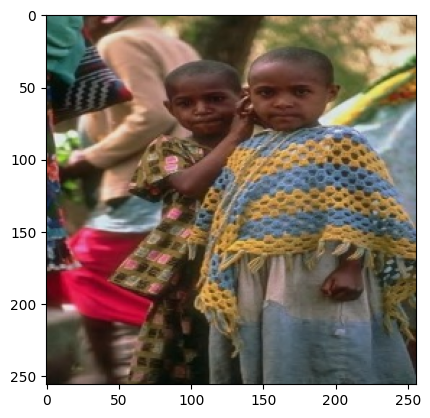

In [71]:
# show one image
plt.imshow(X[0])

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Target, test_size=0.2)

model = Sequential([
    Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=X[0].shape),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, batch_size=32,validation_split=0.2, verbose=0)
model.evaluate(X_test, Y_test, verbose=1)

Y_pred = model.predict(X_test, verbose=0)

7/7 [==============================] - 3s 350ms/step - loss: 4.5736 - accuracy: 0.4550


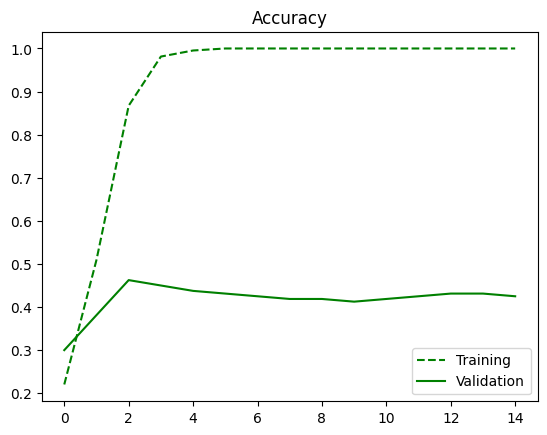

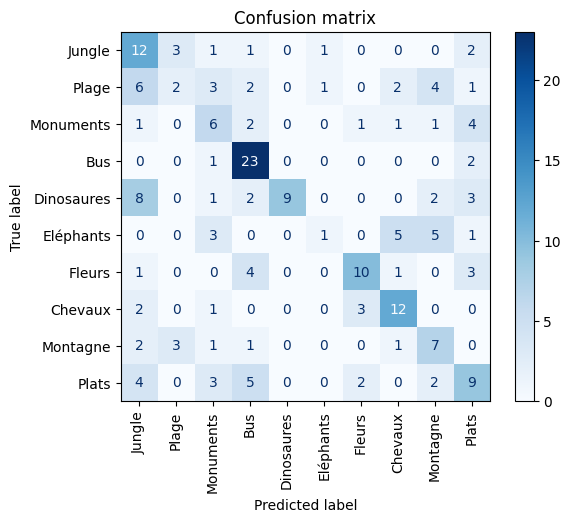

In [73]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], 'g--' )
plt.plot(history.history['val_accuracy'], 'g')
plt.legend(['Training', 'Validation'])
plt.show()

confusionMatrix = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=classes)
disp = disp.plot(include_values=True, cmap=plt.cm.Blues, ax=None, xticks_rotation='vertical')
plt.title('Confusion matrix')
plt.show()